In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

In [2]:
# Série temporal de exemplo
tempo = np.linspace(0, 5, 1000)
sinal = np.sin(2 * np.pi * tempo) + 0.5 * np.sin(4 * np.pi * tempo)  # Sinal com duas componentes de frequência

In [3]:
# Calculando a transformada de Hilbert do sinal
sinal_hilbert = hilbert(sinal)

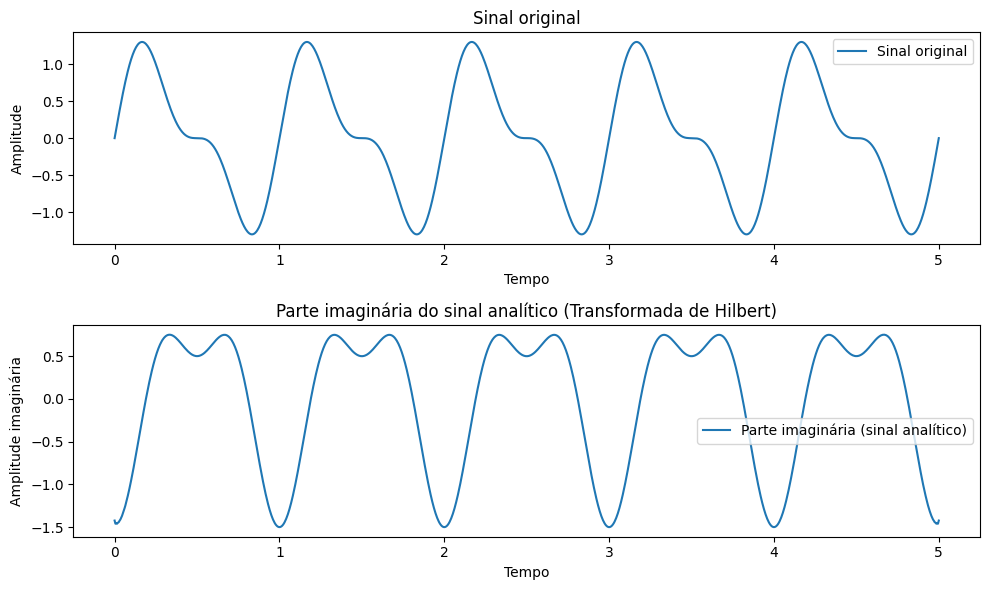

In [4]:
# Plotando o sinal original e a parte imaginária do sinal analítico
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(tempo, sinal, label='Sinal original')
plt.title('Sinal original')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(tempo, np.imag(sinal_hilbert), label='Parte imaginária (sinal analítico)')
plt.title('Parte imaginária do sinal analítico (Transformada de Hilbert)')
plt.xlabel('Tempo')
plt.ylabel('Amplitude imaginária')
plt.legend()

plt.tight_layout()
plt.show()

# Código do Claude Sonet

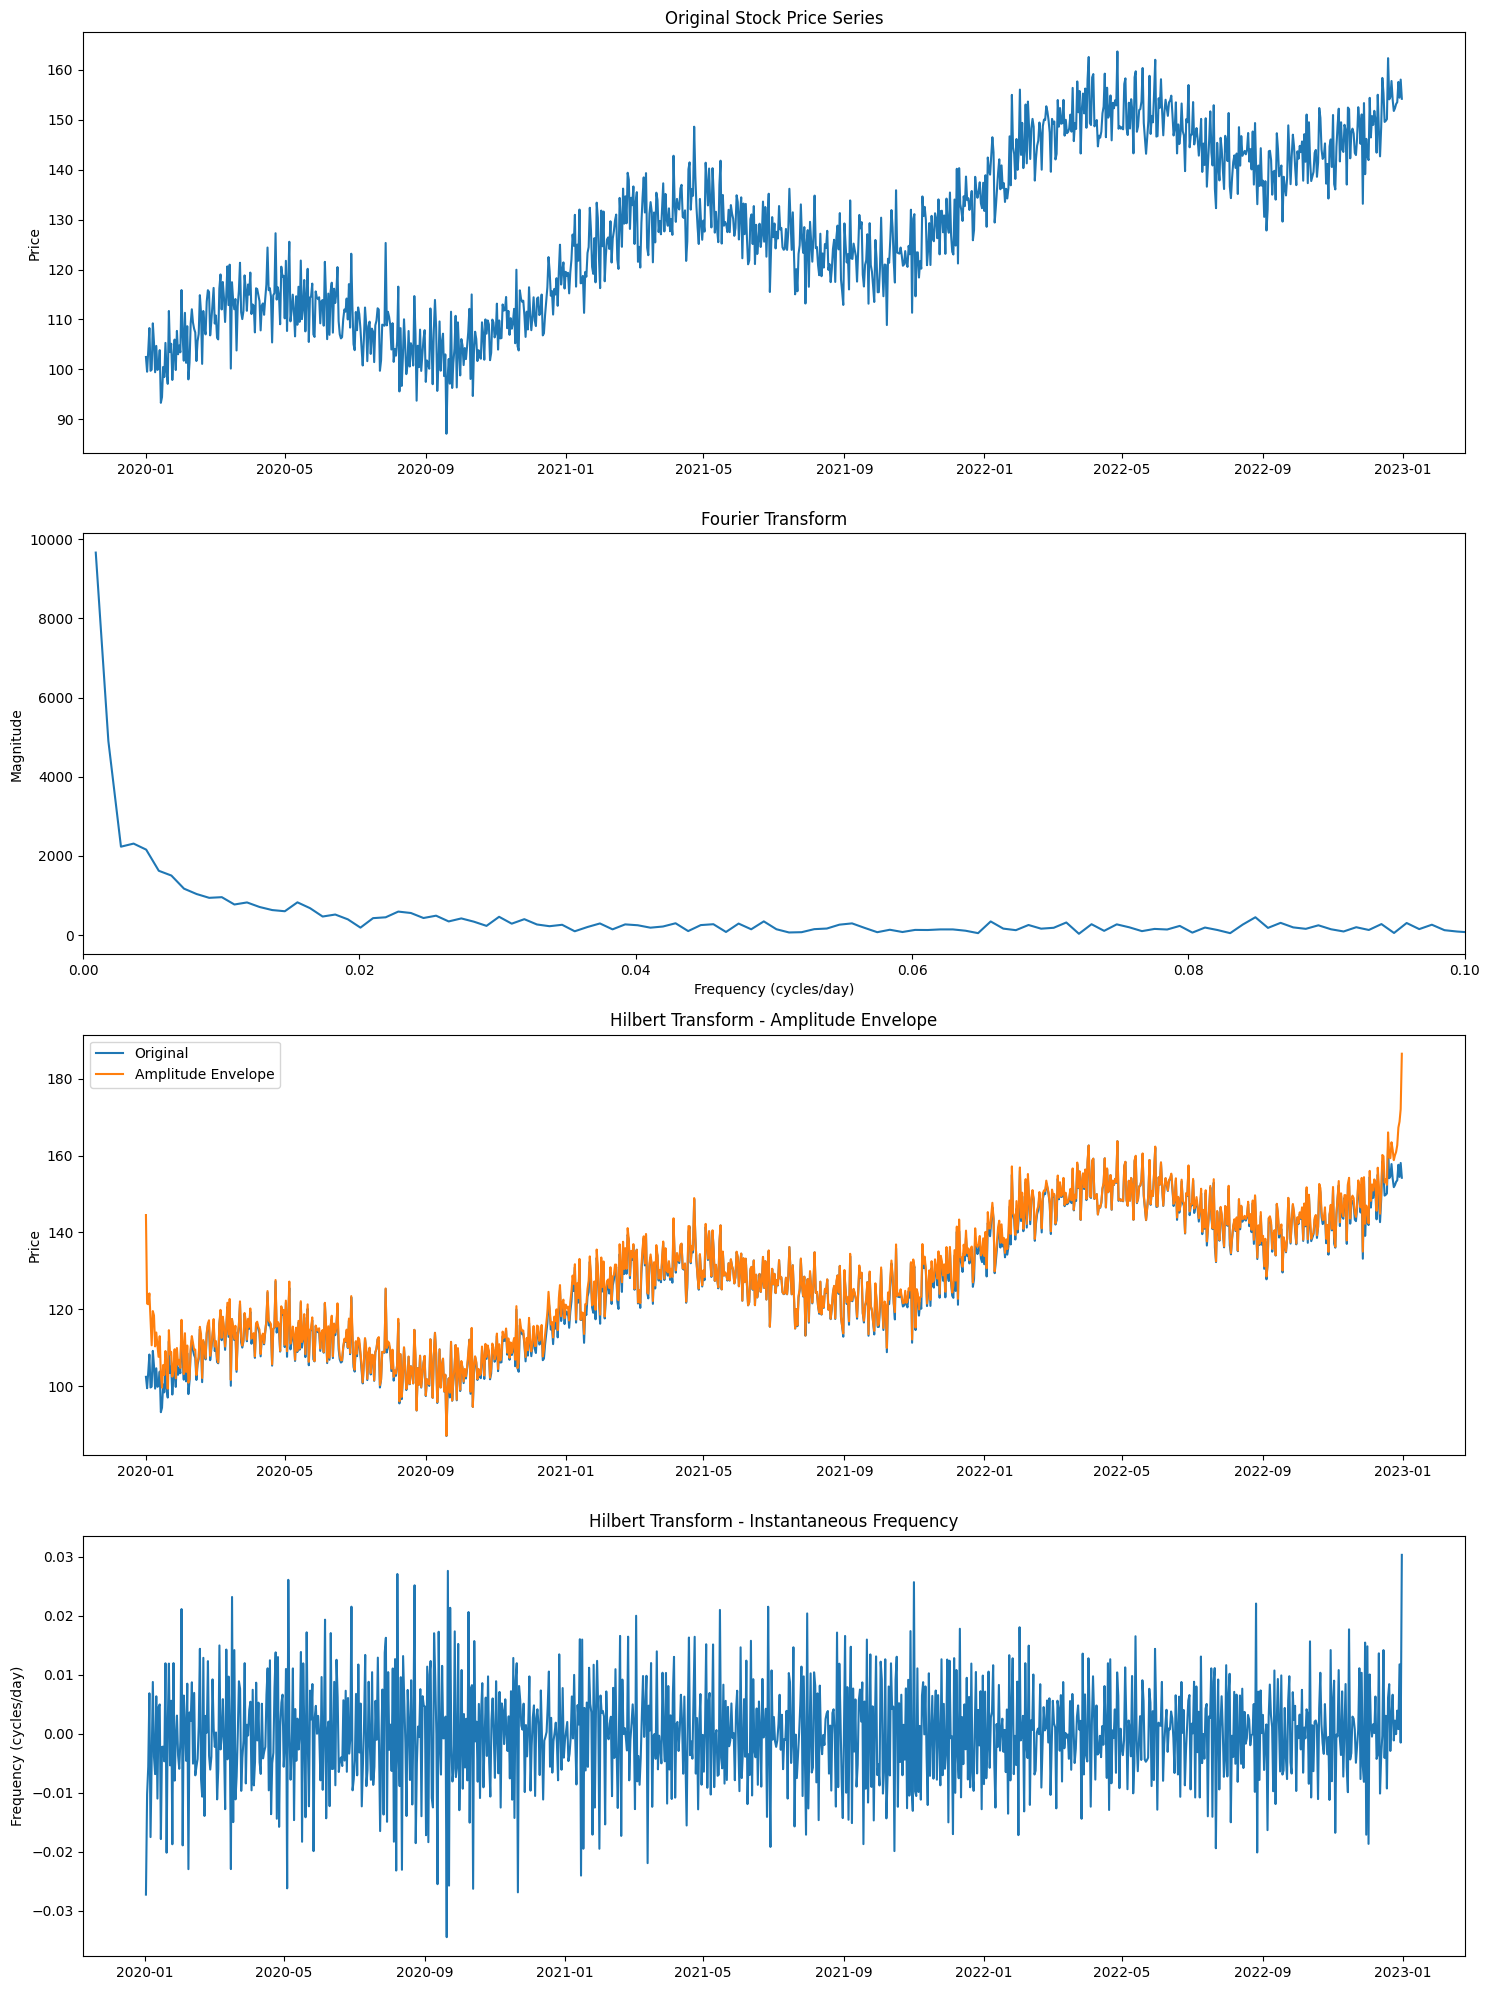

Fourier Transform Analysis:
Top 5 frequencies (cycles/day): [0.00456204 0.00273723 0.00364964 0.00182482 0.00091241]
Corresponding periods (days): [ 219.2         365.33333333  274.          548.         1096.        ]

Hilbert Transform Analysis:
Mean Instantaneous Frequency: -2.699917419936313e-05 cycles/day
Corresponding average period: -37038.17 days


In [5]:
from scipy.fft import fft, fftfreq


# Generate synthetic daily stock price data
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
t = np.arange(len(dates))
trend = 100 + t * 0.05
seasonal = 10 * np.sin(2 * np.pi * t / 365.25)  # Yearly cycle
noise = np.random.normal(0, 5, len(t))
price = trend + seasonal + noise

# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Price': price})
df.set_index('Date', inplace=True)

# Fourier Transform Analysis
n = len(df)
fft_result = fft(df['Price'].values)
frequencies = fftfreq(n, d=1)  # Assuming daily data, so d=1 day
positive_freq_mask = frequencies > 0

# Hilbert Transform Analysis
analytic_signal = hilbert(df['Price'].values)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi)

# Plotting
plt.figure(figsize=(15, 20))

# Original Price Series
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Price'])
plt.title('Original Stock Price Series')
plt.ylabel('Price')

# Fourier Transform
plt.subplot(4, 1, 2)
plt.plot(frequencies[positive_freq_mask], np.abs(fft_result[positive_freq_mask]))
plt.title('Fourier Transform')
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Magnitude')
plt.xlim(0, 0.1)  # Focus on lower frequencies

# Hilbert Transform - Amplitude Envelope
plt.subplot(4, 1, 3)
plt.plot(df.index, df['Price'], label='Original')
plt.plot(df.index, amplitude_envelope, label='Amplitude Envelope')
plt.title('Hilbert Transform - Amplitude Envelope')
plt.ylabel('Price')
plt.legend()

# Hilbert Transform - Instantaneous Frequency
plt.subplot(4, 1, 4)
plt.plot(df.index[1:], instantaneous_frequency)
plt.title('Hilbert Transform - Instantaneous Frequency')
plt.ylabel('Frequency (cycles/day)')

plt.tight_layout()
plt.show()

# Analysis and Interpretation
print("Fourier Transform Analysis:")
top_frequencies = frequencies[positive_freq_mask][np.argsort(np.abs(fft_result[positive_freq_mask]))[-5:]]
print(f"Top 5 frequencies (cycles/day): {top_frequencies}")
print(f"Corresponding periods (days): {1/top_frequencies}")

print("\nHilbert Transform Analysis:")
print(f"Mean Instantaneous Frequency: {np.mean(instantaneous_frequency)} cycles/day")
print(f"Corresponding average period: {1/np.mean(instantaneous_frequency):.2f} days")

# Transformada Hilbert-Huang